<a href="https://colab.research.google.com/github/ThomasRoa/Integracion-de-datos-2025/blob/main/Parcial_II_Thomas_Roa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [95]:
ruta_archivo = "/content/3. Perdida Productividad_Zonas(I) (1).xlsx"
xls = pd.ExcelFile("/content/3. Perdida Productividad_Zonas(I) (1) (1).xlsx")

In [96]:
df_observados = xls.parse("Datos Observados")

In [97]:
df_observados.columns = df_observados.columns.str.strip()

In [98]:
df_riesgo = df_observados[["Frecuencia", "Severidad"]].dropna()

In [99]:
resultados_gestion = {}
niveles = [1, 2, 3, 4]

In [100]:
for n in niveles:
    severidad_ajustada = df_riesgo["Severidad"] / n
    perdida_total = df_riesgo["Frecuencia"] * severidad_ajustada

    descripcion = perdida_total.describe()
    asimetria = skew(perdida_total)
    opvar = np.percentile(perdida_total, 99)

    resultados_gestion[f"1:{n}"] = {
        "Media": descripcion["mean"],
        "Desviación Std": descripcion["std"],
        "Mínimo": descripcion["min"],
        "Percentil 25": descripcion["25%"],
        "Mediana": descripcion["50%"],
        "Percentil 75": descripcion["75%"],
        "Máximo": descripcion["max"],
        "Coef. Asimetría": asimetria,
        "OpVaR (99%)": opvar
    }

In [101]:
df_resultados = pd.DataFrame(resultados_gestion).T
print(df_resultados)

pd.options.display.float_format = "{:,.2f}".format
df_resultados

           Media  Desviación Std  ...  Coef. Asimetría   OpVaR (99%)
1:1 3,770,378.85    4,995,296.34  ...             0.80 19,321,039.82
1:2 1,885,189.42    2,497,648.17  ...             0.80  9,660,519.91
1:3 1,256,792.95    1,665,098.78  ...             0.80  6,440,346.61
1:4   942,594.71    1,248,824.09  ...             0.80  4,830,259.96

[4 rows x 9 columns]


,Media,Desviación Std,Mínimo,Percentil 25,Mediana,Percentil 75,Máximo,Coef. Asimetría,OpVaR (99%)
1:1,"3,770,378.85","4,995,296.34","-12,274,667.14","720,485.24","2,943,263.38","6,090,743.51","21,061,685.70",0.80,"19,321,039.82"
1:2,"1,885,189.42","2,497,648.17","-6,137,333.57","360,242.62","1,471,631.69","3,045,371.75","10,530,842.85",0.80,"9,660,519.91"
1:3,"1,256,792.95","1,665,098.78","-4,091,555.71","240,161.75","981,087.79","2,030,247.84","7,020,561.90",0.80,"6,440,346.61"
1:4,"942,594.71","1,248,824.09","-3,068,666.79","180,121.31","735,815.85","1,522,685.88","5,265,421.42",0.80,"4,830,259.96"


In [102]:
df_riesgo = df_observados[['Frecuencia', 'Severidad']].dropna()
niveles = [1, 2, 3, 4]
perdidas_por_nivel = {}

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

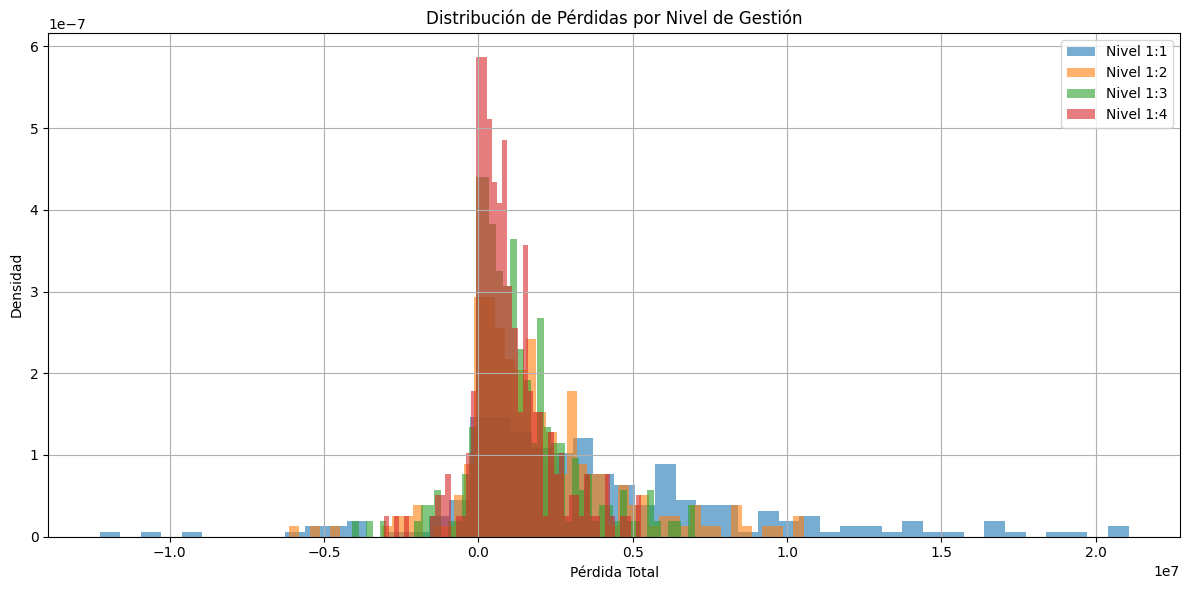

In [103]:
for n in niveles:
    severidad_ajustada = df_riesgo['Severidad'] / n
    perdidas = df_riesgo['Frecuencia'] * severidad_ajustada
    perdidas_por_nivel[f'1:{n}'] = perdidas
    plt.figure(figsize=(12,6))
for nivel, perdidas in perdidas_por_nivel.items():
    plt.hist(perdidas, bins=50, alpha=0.6, label=f'Nivel {nivel}', density=True)
plt.title('Distribución de Pérdidas por Nivel de Gestión')
plt.xlabel('Pérdida Total')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
df_observados = xls.parse("Datos Observados")
finca_1 = xls.parse("Finca 1")
finca_2 = xls.parse("Finca 2")
finca_3 = xls.parse("Finca 3")
finca_4 = xls.parse("Finca 4")

In [105]:
for df in [df_observados, finca_1, finca_2, finca_3, finca_4]:
    df.columns = df.columns.str.strip()

In [106]:
def calcular_metricas(df):
    df = df[["Frecuencia", "Severidad"]].dropna()
    perdida = df["Frecuencia"] * df["Severidad"]
    desc = perdida.describe()
    asim = skew(perdida)
    opvar = np.percentile(perdida, 99)
    return {
        "Media": desc["mean"],
        "Desviación Std": desc["std"],
        "Mínimo": desc["min"],
        "Percentil 25": desc["25%"],
        "Mediana": desc["50%"],
        "Percentil 75": desc["75%"],
        "Máximo": desc["max"],
        "Coef. Asimetría": asim,
        "OpVaR (99%)": opvar
    }

In [107]:
metricas_base = calcular_metricas(df_observados)

In [108]:
fincas = {"Finca 1": finca_1, "Finca 2": finca_2, "Finca 3": finca_3, "Finca 4": finca_4}
df_integrado = df_observados.copy()
comparaciones = {}

for nombre, finca in fincas.items():
    df_integrado = pd.concat([df_integrado, finca], ignore_index=True)
    metricas_integradas = calcular_metricas(df_integrado)

    comparaciones[nombre] = {
        "Antes - Media": metricas_base["Media"],
        "Después - Media": metricas_integradas["Media"],
        "Antes - Desviación Std": metricas_base["Desviación Std"],
        "Después - Desviación Std": metricas_integradas["Desviación Std"],
        "Antes - Coef. Asimetría": metricas_base["Coef. Asimetría"],
        "Después - Coef. Asimetría": metricas_integradas["Coef. Asimetría"],
        "Antes - OpVaR (99%)": metricas_base["OpVaR (99%)"],
        "Después - OpVaR (99%)": metricas_integradas["OpVaR (99%)"]
    }

In [109]:
df_comparacion = pd.DataFrame(comparaciones).T
pd.options.display.float_format = "{:,.2f}".format
df_comparacion

,Antes - Media,Después - Media,Antes - Desviación Std,Después - Desviación Std,Antes - Coef. Asimetría,Después - Coef. Asimetría,Antes - OpVaR (99%),Después - OpVaR (99%)
Finca 1,"3,770,378.85","3,709,626.15","4,995,296.34","5,367,008.15",0.80,0.53,"19,321,039.82","21,025,327.71"
Finca 2,"3,770,378.85","3,683,857.02","4,995,296.34","5,214,670.97",0.80,0.52,"19,321,039.82","19,572,818.74"
Finca 3,"3,770,378.85","3,667,387.42","4,995,296.34","5,210,731.82",0.80,0.38,"19,321,039.82","19,308,469.00"
Finca 4,"3,770,378.85","3,640,221.56","4,995,296.34","5,301,487.79",0.80,0.19,"19,321,039.82","19,266,996.71"


In [110]:
fincas = [finca_1, finca_2, finca_3, finca_4]
df_integrado = df_observados.copy()
perdidas_integradas = {"Base Observada": df_riesgo['Frecuencia'] * df_riesgo['Severidad']}

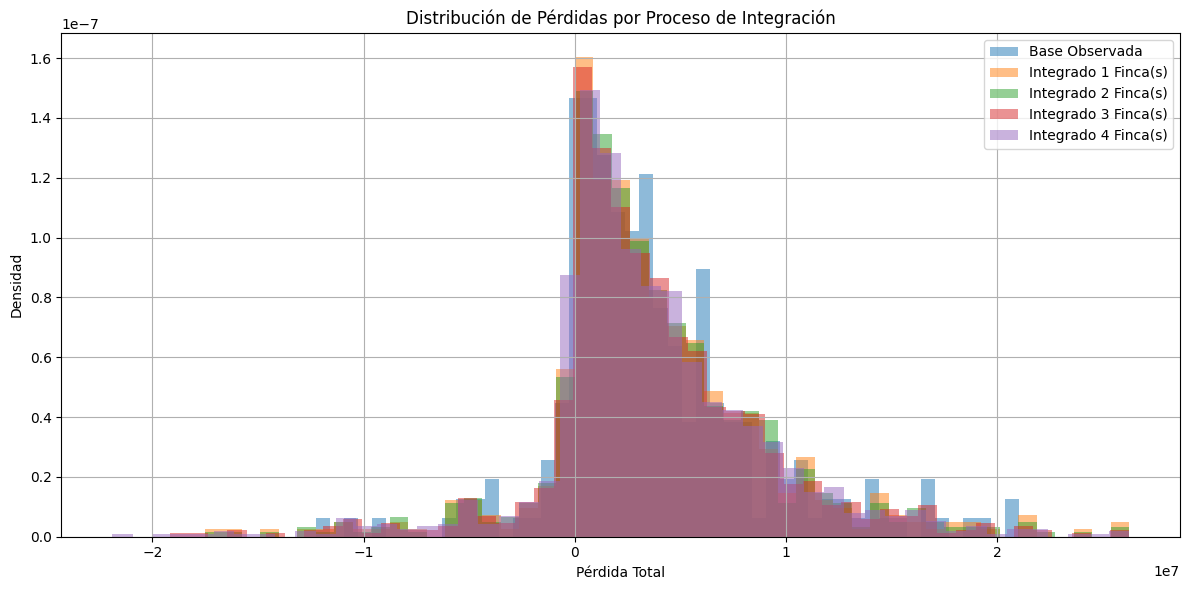

In [111]:
for i, finca in enumerate(fincas, start=1):
    df_integrado = pd.concat([df_integrado, finca], ignore_index=True)
    df_temp = df_integrado[['Frecuencia', 'Severidad']].dropna()
    perdidas = df_temp['Frecuencia'] * df_temp['Severidad']
    perdidas_integradas[f'Integrado {i} Finca(s)'] = perdidas

plt.figure(figsize=(12,6))
for nombre, perdidas in perdidas_integradas.items():
    plt.hist(perdidas, bins=50, alpha=0.5, label=nombre, density=True)
plt.title('Distribución de Pérdidas por Proceso de Integración')
plt.xlabel('Pérdida Total')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [112]:
df = df_observados[['Frecuencia', 'Severidad']].dropna().copy()
df['Pérdida Total'] = df['Frecuencia'] * df['Severidad']

In [113]:
frecuencia_labels = ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
severidad_labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']

df['Frecuencia Cualitativa'] = pd.qcut(df['Frecuencia'], q=5, labels=frecuencia_labels)
df['Severidad Cualitativa'] = pd.qcut(df['Severidad'], q=5, labels=severidad_labels)

In [115]:
matriz = pd.pivot_table(
    df,
    values='Pérdida Total',
    index='Frecuencia Cualitativa',
    columns='Severidad Cualitativa',
    aggfunc='mean'
).round(2)

<ipython-input-115-9612f1d9e015>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  matriz = pd.pivot_table(


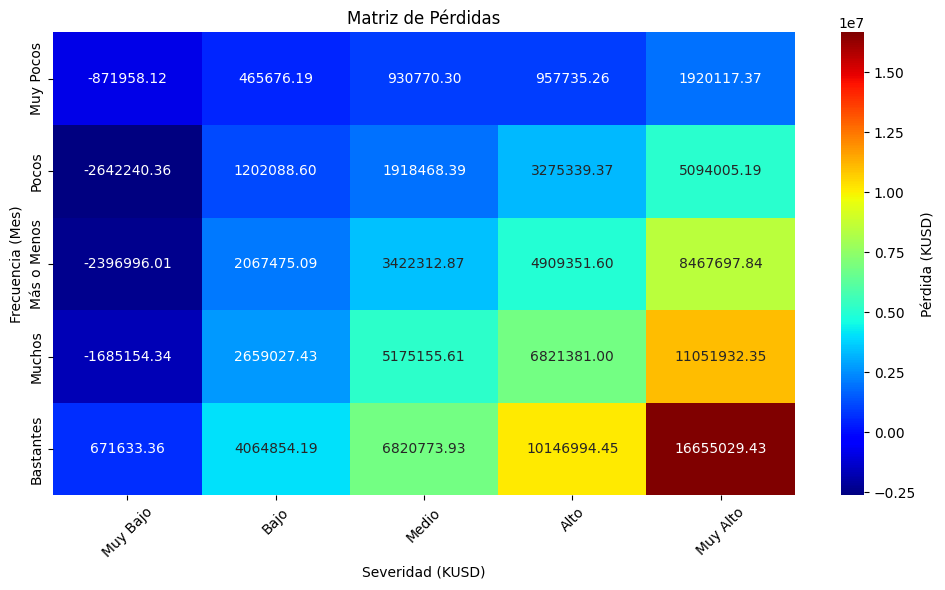

In [116]:
plt.figure(figsize=(10, 6))
sns.heatmap(matriz, annot=True, fmt=".2f", cmap='jet', cbar_kws={'label': 'Pérdida (KUSD)'})
plt.title("Matriz de Pérdidas")
plt.xlabel("Severidad (KUSD)")
plt.ylabel("Frecuencia (Mes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*ANALISIS DE RESULTADO*

El análisis comparativo entre los valores “antes” y “después” para las cuatro fincas muestra una serie de cambios relevantes en términos de media, desviación estándar, coeficiente de asimetría y OpVaR al 99%, que permiten evaluar los efectos de una intervención (presumiblemente un cambio operativo, técnico o de gestión).

En primer lugar, se observa una disminución sistemática en la media de todas las fincas después de la intervención. La finca 1 presenta la menor caída (aproximadamente 60 mil), mientras que la finca 4 experimenta la mayor reducción (más de 130 mil). Esto sugiere que, tras la intervención, el valor promedio del indicador analizado —posiblemente ingresos, rendimiento o utilidad— se redujo, lo que podría interpretarse como una pérdida de eficiencia o productividad en términos generales.

Todas las fincas muestran un incremento en la desviación estándar, lo que implica un aumento en la variabilidad de los resultados. Este aumento en la dispersión representa un mayor nivel de incertidumbre o riesgo en los valores observados tras la intervención. Por ejemplo, la desviación estándar en la finca 1 pasó de 4.99 millones a 5.36 millones, lo que representa un aumento considerable.

Respecto al coeficiente de asimetría se nota una mejora general en la forma de la distribución de los datos. Todas las fincas tenían inicialmente un coeficiente de 0.80 (con una clara asimetría positiva), y tras la intervención este valor se redujo en todos los casos, siendo la finca 4 la que alcanzó una mayor simetría (0.19). Esto sugiere una menor probabilidad de eventos extremos y una distribución más equilibrada, lo cual es positivo desde la perspectiva de control de riesgos.

Al observar el OpVaR (Operational Value at Risk) al 99%, que mide el peor escenario de pérdida con un nivel de confianza del 99%, los resultados son mixtos. La finca 1 presenta un aumento significativo en su OpVaR, lo que indica un mayor riesgo potencial tras la intervención. La finca 2 también experimenta un ligero aumento, mientras que las fincas 3 y 4 lograron reducir su OpVaR, lo que implica una mejora en la contención del riesgo extremo.